# Fraud Detection in Transaction

1. **Data cleaning including missing values, outliers, and multi-collinearity**:
   We performed exploratory data analysis and addressed missing values in the dataset. It was observed that the data was unbalanced. To gain insights into relationships between variables, we plotted a heatmap to check for multi-collinearity.

    To analyze outliers, we plotted different graphs, including "Amount" for cases with 'isFraud' equal to 1 and 0 separately. This allowed us to understand the distribution and potential presence of outliers in each class.

    To handle outliers, we implemented outlier detection models, such as Isolation Forest and Local Outlier Factor (LOF). These unsupervised anomaly detection algorithms helped identify and deal with outliers effectively.

2. **Describe your fraud detection model in elaboration**:
    Isolation Forest is an unsupervised anomaly detection algorithm that isolates rare and different instances from the majority of the data. It uses binary trees to partition the data and identify outliers, which require fewer partitions to be isolated compared to normal instances. The IsolationForest class from scikit-learn is used to create the Isolation Forest model.
    
    Local Outlier Factor is another unsupervised anomaly detection algorithm that measures the local deviation of density for each data point with respect to its neighbors. It assigns an outlier score based on the local density compared to its neighbors, with significantly lower density indicating outliers. The LocalOutlierFactor class from scikit-learn is used to create the LOF model.
   The fraud detection model used in this code is a RandomForestClassifier. RandomForest is an ensemble learning method that combines multiple decision trees to make predictions. It is well-suited for classification tasks like fraud detection, as it can handle imbalanced datasets and capture complex patterns in the data.

3. **How did you select variables to be included in the model?**:
    Variable inclusion/exclusion in the dataset depends on factors like relevance and multicollinearity. When considering variables, it's crucial to include those that have a meaningful impact on the target variable and exclude irrelevant ones like "Name"(if it was present in our dataset)"

     Additionally, multicollinearity, where variables are highly correlated, can lead to unstable model coefficients. To avoid redundancy, highly correlated variables can be removed. However, in this dataset, multicollinearity was not significant, so both types of variables were used for model training.

    During the analysis, the "isFlaggedFraud" column's poor performance as a predictor was observed. Hence, I removed from the dataset to prevent noise from affecting the model's accuracy and effectiveness in detecting fraud.
   

4. **Demonstrate the performance of the model by using the best set of tools**:
   The code demonstrates the performance of the RandomForestClassifier using various datasets - Sampled, Undersampled, and Oversampled It prints the classification report and confusion matrix for both the training and testing sets, along with accuracy scores.

5. **What are the key factors that predict fraudulent customers?**:
   Visualization Plots:
   Amount per transaction by class: It displays histograms of transaction amounts for both fraud and normal transactions. The x-axis represents the transaction amount, and the y-axis shows the number of transactions within each bin.

   Time of transaction vs Amount by class: It shows scatter plots of transaction time against transaction amount for fraud and normal transactions.

6. **Do these factors make sense? If yes, how? If not, how not?**:
    Yes, these factors make sense in the context of fraud detection. Fraudsters often exhibit abnormal behavior compared to legitimate customers. Unusual transaction amounts and frequencies can be indicative of attempts to exploit vulnerabilities. Anomalies and time-based patterns can help identify potential unauthorized access. Analyzing these information can aid in recognizing suspicious activities.


7. **What kind of prevention should be adopted while the company updates its infrastructure?**:
   Preventing fraud requires a multi-layered approach. Some prevention measures include:
   1. Implement real-time transaction monitoring to detect and flag unusual patterns or suspicious activities promptly.
   2. Strengthen authentication and authorization mechanisms to ensure secure access to critical systems and data.
   3. Conduct regular security audits and vulnerability assessments to identify and address potential weaknesses in the infrastructure.
   4. Educate customers and employees about fraud risks and best practices for prevention, creating a vigilant and informed workforce.
   5. Foster collaboration with industry peers and share threat intelligence to stay ahead of emerging fraud threats and enhance overall defense measures.

8. **Assuming these actions have been implemented, how would you determine if they work?**:
   The effectiveness of fraud prevention measures can be assessed using various metrics, such as:
   1. Reduction in the number of confirmed fraud cases.
   2. Decrease in financial losses due to fraud.
   3. Increase in fraud detection rate (sensitivity/recall).
   4. Improvement in precision to reduce false positives.
   5. Feedback from customers and employees regarding security perceptions.

In [3]:
!pip install seaborn 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [4]:
#Importing Necessary Libraries 
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#Importing the dataset
df = pd.read_csv("Fraud.csv")

In [6]:
#Visualizing the Dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA 

In [7]:
#Checking the datatype of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#Calculating the number of Fraud 
df["isFraud"].sum()

8213

In [9]:
#Overall Number of Rows
df["isFraud"].shape[0]

6362620

<Axes: xlabel='isFraud', ylabel='count'>

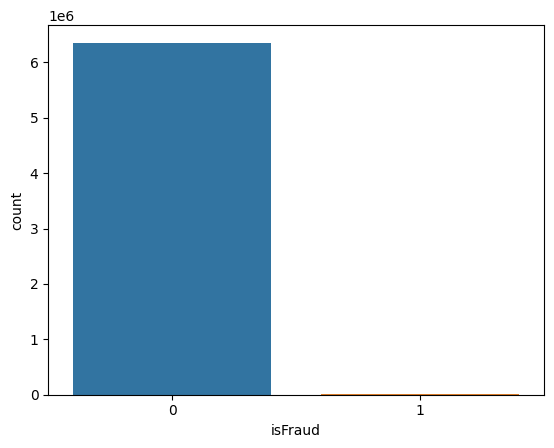

In [10]:
#Ploting isFraud (0 vs 1)
import seaborn as sns
sns.countplot(x ="isFraud", data = df)

Here, we can see that it's an imbalanced dataset. So, we can't apply a straightforward classification model.

In [11]:
#Checking the null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
#Number of Unique Values 
df["nameDest"].nunique()

2722362

In [13]:
#Total Number of Rows
df["nameDest"].shape[0]

6362620

In [14]:
print("Repeated Values : ")
print(6362620-2722362)

Repeated Values : 
3640258


In [15]:
#Visualizing the Count of Types of Transaction Made
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

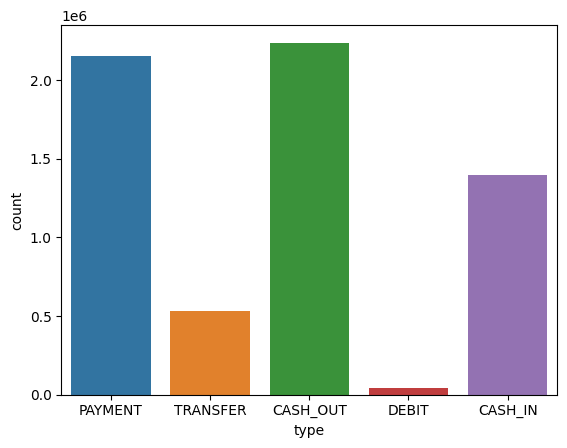

In [16]:
sns.countplot(x ="type", data = df)

In [17]:
df["amount"].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [18]:
#Checking IsFlaggedFraud Column Accuracy
cm = confusion_matrix(df["isFraud"], df["isFlaggedFraud"])
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[6354407       0]
 [   8197      16]]


In [19]:
df[df["isFraud"] == 1]["amount"].describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [20]:
fraud = df[df['isFraud'] == 1]
normal = df[df['isFraud'] == 0]

# Calculate the maximum 'amount' for fraud and normal cases
max_fraud_amount = fraud["amount"].max()
max_normal_amount = normal["amount"].max()

# Print the results
#print("Is the sum of 'isFlaggedFraud' equal to the total number of fraud cases?", is_flagged_fraud_equals_total)
print("Maximum 'amount' for fraud cases:", max_fraud_amount)
print("Maximum 'amount' for normal cases:", max_normal_amount)
print("Total number of fraud cases:", fraud.shape[0])

Maximum 'amount' for fraud cases: 10000000.0
Maximum 'amount' for normal cases: 92445516.64
Total number of fraud cases: 8213


<Axes: xlabel='type', ylabel='count'>

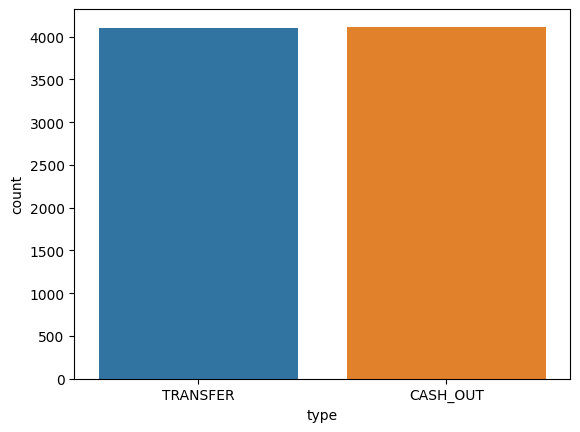

In [21]:
sns.countplot(x ="type", data = fraud)

In [22]:
dict={}
for i in fraud["amount"]:
    if i  not in dict:
        dict[i]=1
    else:
        dict[i]=dict[i]+1

In [23]:
%%capture
dict

In [24]:
max_key = None
max_value = None

for key, value in dict.items():
    if max_value is None or value > max_value:
        max_key = key
        max_value = value
print("Amount corresponding to Maximum number of Transaction :", max_key)
print("Count of Maximum number of Transction to a particular Amount", max_value)

Amount corresponding to Maximum number of Transaction : 10000000.0
Count of Maximum number of Transction to a particular Amount 287


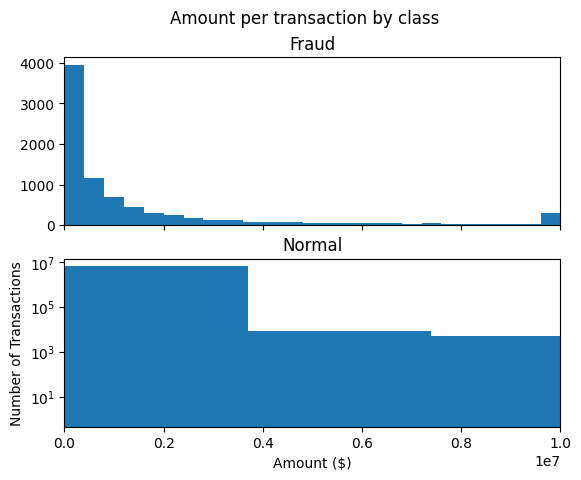

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 25
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 10000000 ))
plt.yscale('log')
plt.show();

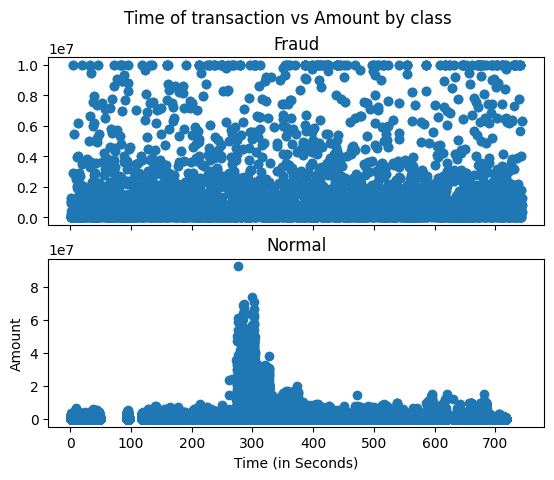

In [26]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.step, fraud.amount)
ax1.set_title('Fraud')
ax2.scatter(normal.step, normal.amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

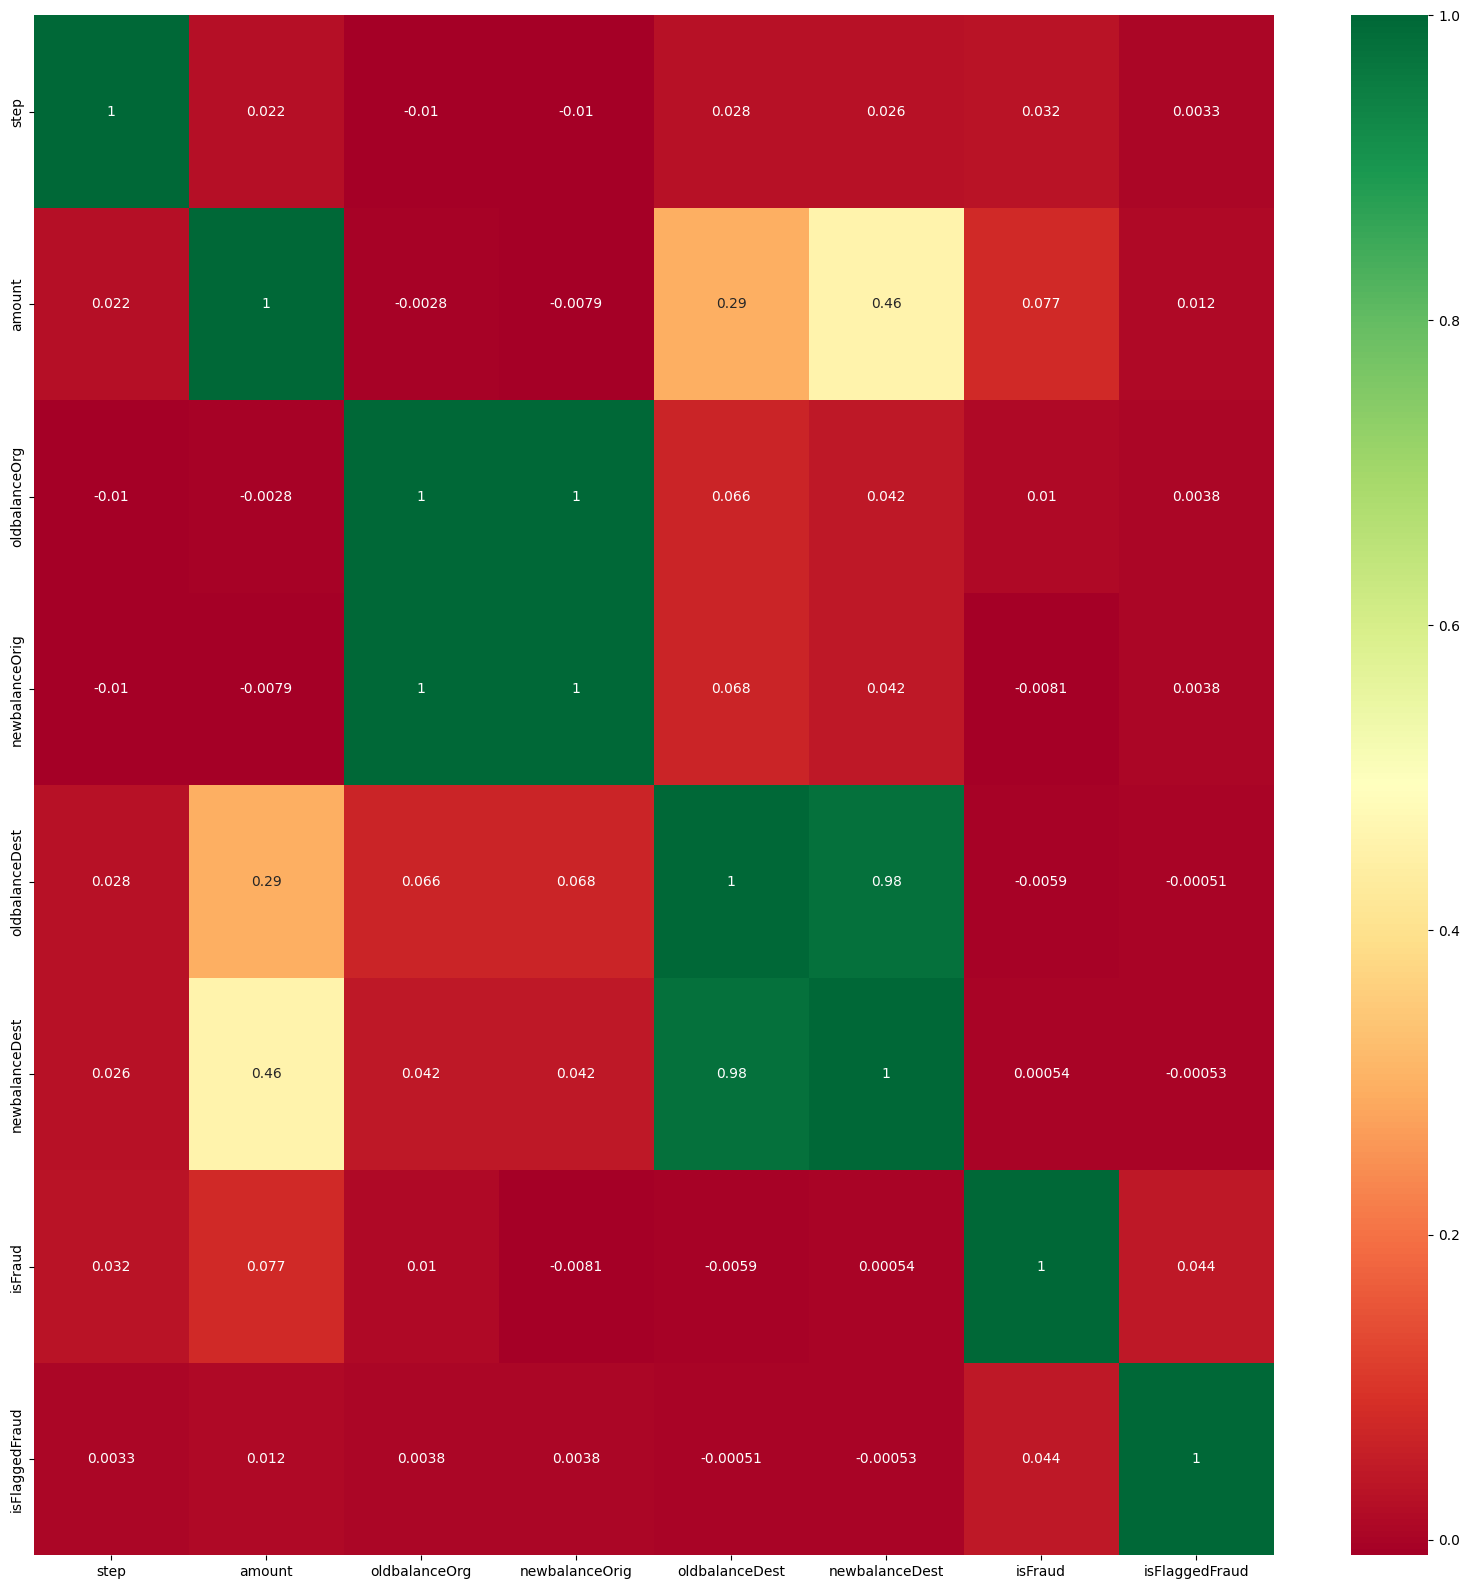

In [27]:
#Ploting the heatmap for Checking the Correlation between variables
data1 = df.sample(frac = 0.1,random_state=1) #(for 10% of data)
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr(numeric_only=True)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

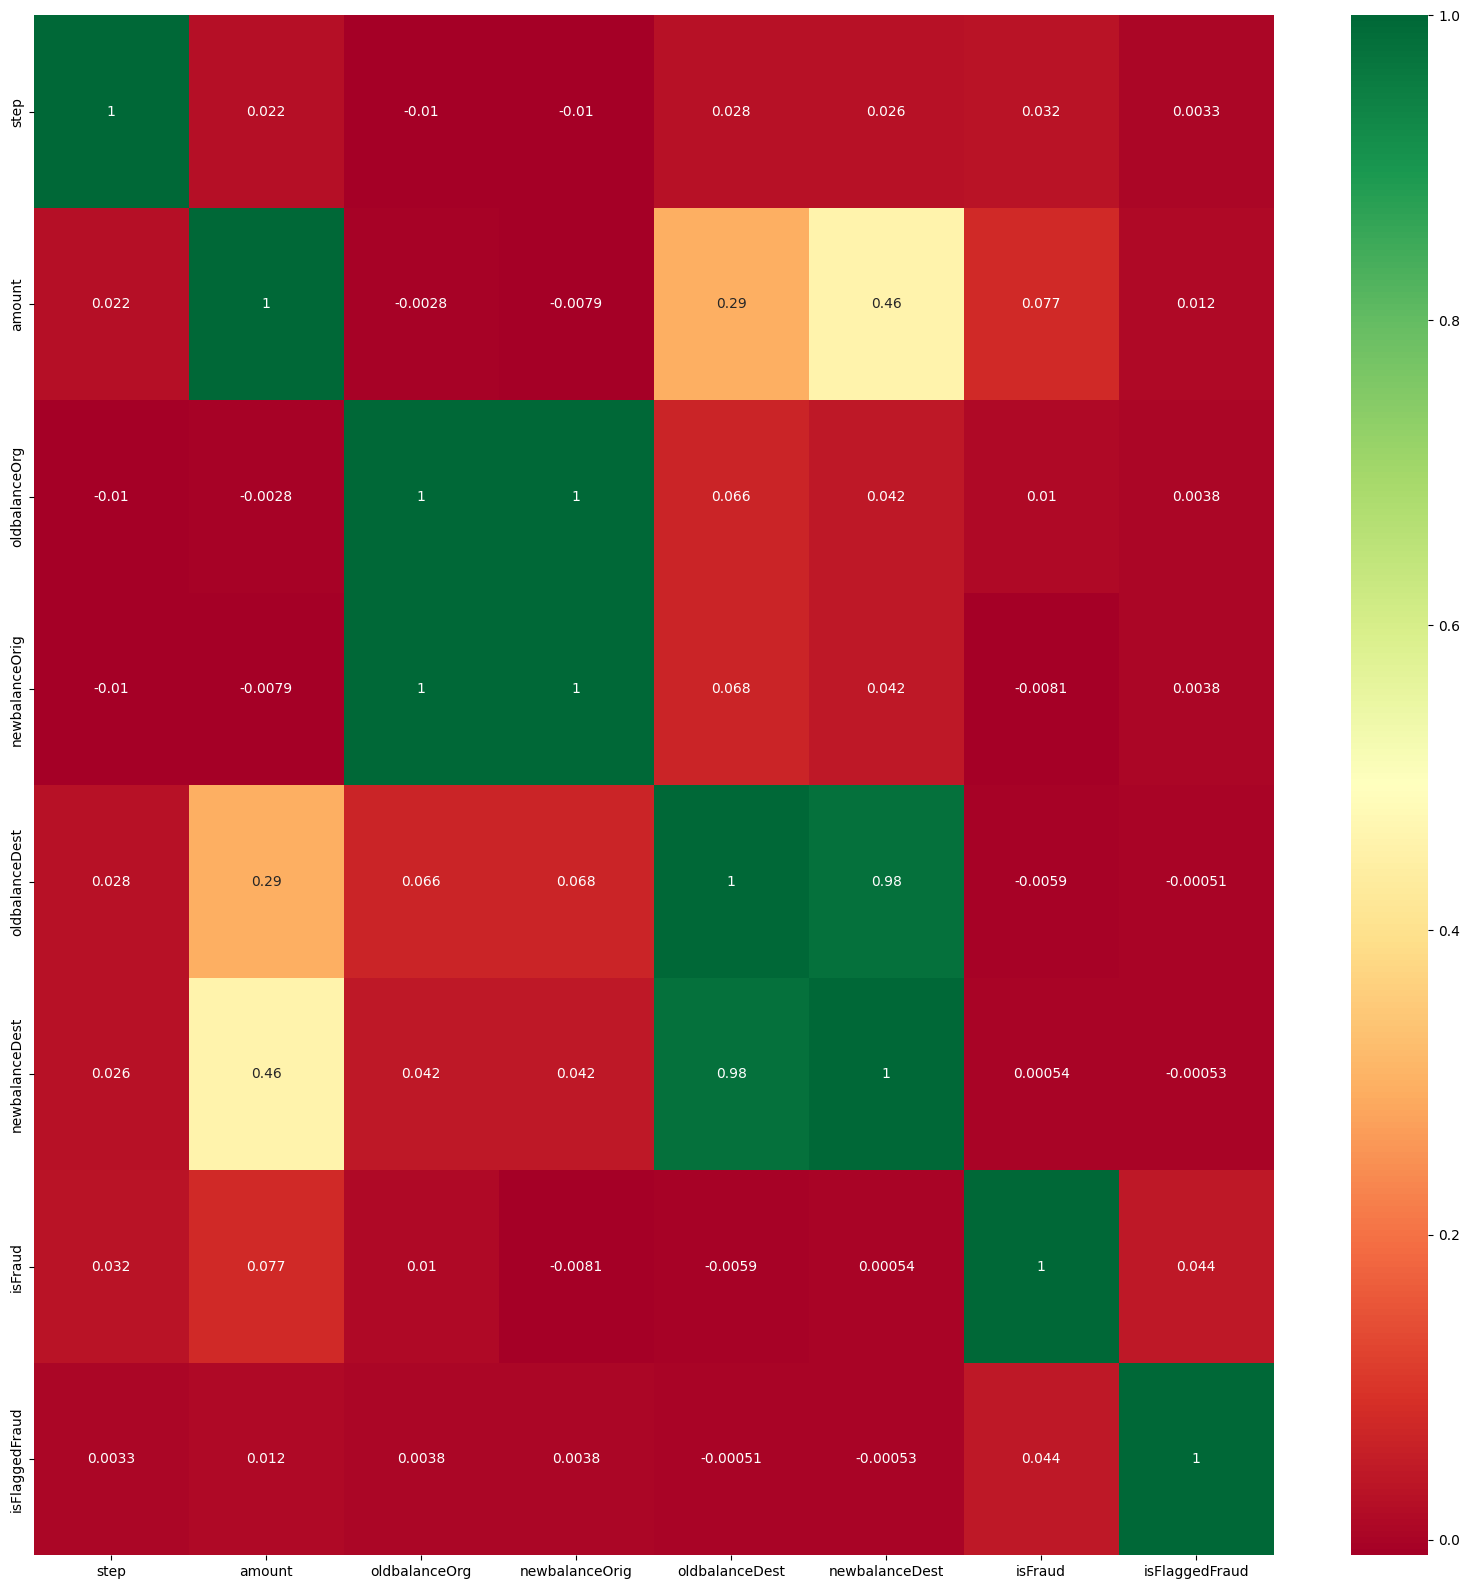

In [28]:
#For whole data
corrmat = df.corr(numeric_only=True)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
# # Handle multi-collinearity
# corr = df.corr()
# print(corr)
# high_corr_cols = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_)).abs()
# to_drop = [column for column in high_corr_cols.columns if any(high_corr_cols[column] > 0.8)]
# df = df.drop(to_drop, axis=1)

In [30]:
Fraud = data1[data1['isFraud']==1]

Valid = data1[data1['isFraud']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [31]:
outlier_fraction 

0.0012888646188564514

In [32]:
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "isFraud"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(636262, 11)
(636262,)


In [33]:
Y.sum()

819

In [34]:
%%capture
!pip install tensorflow
import tensorflow
from tensorflow.keras.utils import to_categorical

D0913 05:28:22.071623478      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0913 05:28:22.071650304      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0913 05:28:22.071653948      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0913 05:28:22.071656839      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0913 05:28:22.071659506      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0913 05:28:22.071663583      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0913 05:28:22.071666404      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0913 05:28:22.

In [35]:
X = pd.get_dummies(X, columns=["type"])

In [36]:
X.drop('nameDest', axis=1, inplace=True)
X.drop('isFlaggedFraud' , axis=1 , inplace = True)
X.drop('nameOrig' , axis=1 , inplace = True)

In [37]:
##Define the outlier detection methods

classifiers ={
    
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
   
            }

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name, n_errors))
    print("Accuracy Score:")
    print(accuracy_score(Y, y_pred))
    print("Classification Report:")
    print(classification_report(Y, y_pred))
    
    # Calculate and print the confusion matrix
    cm = confusion_matrix(Y, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("--------------------")


Isolation Forest: 1056
Accuracy Score:
0.9983403063517859
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635443
           1       0.36      0.36      0.36       819

    accuracy                           1.00    636262
   macro avg       0.68      0.68      0.68    636262
weighted avg       1.00      1.00      1.00    636262

Confusion Matrix:
[[634914    529]
 [   527    292]]
--------------------
Local Outlier Factor: 1618
Accuracy Score:
0.9974570224215811
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635443
           1       0.01      0.01      0.01       819

    accuracy                           1.00    636262
   macro avg       0.51      0.51      0.51    636262
weighted avg       1.00      1.00      1.00    636262

Confusion Matrix:
[[634633    810]
 [   808     11]]
--------------------


In [39]:
# Handle multi-collinearity
corr = X.corr()
print(corr)
high_corr_cols = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_)).abs()
to_drop = [column for column in high_corr_cols.columns if any(high_corr_cols[column] > 0.8)]
new_data = X.drop(to_drop, axis=1)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022690      -0.011070       -0.011208   
amount          0.022690  1.000000      -0.002931       -0.007762   
oldbalanceOrg  -0.011070 -0.002931       1.000000        0.998855   
newbalanceOrig -0.011208 -0.007762       0.998855        1.000000   
oldbalanceDest  0.026420  0.297258       0.068379        0.069997   
newbalanceDest  0.024618  0.464148       0.043237        0.043021   
isFraud         0.032236  0.072849       0.009412       -0.007870   
type_CASH_IN    0.002820 -0.010031       0.506827        0.527365   
type_CASH_OUT  -0.013384 -0.003475      -0.201415       -0.211504   
type_DEBIT      0.002067 -0.023911      -0.021521       -0.021945   
type_PAYMENT    0.006228 -0.201136      -0.189457       -0.193891   
type_TRANSFER   0.007625  0.371533      -0.081679       -0.087337   

                oldbalanceDest  newbalanceDest   isFraud  type_CASH_IN  \
step                  0.0264

In [40]:
##Define the outlier detection methods

classifiers ={
    
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
   
            }

for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name, n_errors))
    print("Accuracy Score:")
    print(accuracy_score(Y, y_pred))
    print("Classification Report:")
    print(classification_report(Y, y_pred))
    
    # Calculate and print the confusion matrix
    cm = confusion_matrix(Y, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("--------------------")


Isolation Forest: 1122
Accuracy Score:
0.9982365754987725
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635443
           1       0.32      0.32      0.32       819

    accuracy                           1.00    636262
   macro avg       0.66      0.66      0.66    636262
weighted avg       1.00      1.00      1.00    636262

Confusion Matrix:
[[634881    562]
 [   560    259]]
--------------------
Local Outlier Factor: 1618
Accuracy Score:
0.9974570224215811
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635443
           1       0.01      0.01      0.01       819

    accuracy                           1.00    636262
   macro avg       0.51      0.51      0.51    636262
weighted avg       1.00      1.00      1.00    636262

Confusion Matrix:
[[634633    810]
 [   808     11]]
--------------------


In [41]:
data_new = df
data_new = pd.get_dummies(data_new, columns=["type"])
data_new.drop("nameOrig" ,axis=1 , inplace = True)
data_new.drop("nameDest" ,axis=1 , inplace = True)

In [42]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data_new[(data_new['isFraud']==0)] 
df_minority = data_new[(data_new['isFraud']==1)]

# upsample minority class
df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=6354407,
                                 random_state=42)
# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.isFraud.value_counts()

isFraud
1    6354407
0    6354407
Name: count, dtype: int64

In [43]:
df_oversampled.isFraud.value_counts()

isFraud
1    6354407
0    6354407
Name: count, dtype: int64

In [44]:
X_oversampled = df_oversampled.drop('isFraud', axis=1)
y_oversampled = df_oversampled['isFraud']
X_oversampled.shape, y_oversampled.shape

((12708814, 12), (12708814,))

In [45]:
y1= df["isFraud"]

In [46]:
X1 = data_new.drop("isFraud", axis=1)

In [47]:
X1 = X1.drop("isFlaggedFraud" , axis=1)
X1

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,False,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,False,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,False,False,False,False,True


In [50]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [51]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = rus.fit_resample(X1, y1)
print(f"The number of Classes before the fit {Counter(y1)}")
print(f"The number of Classes after the fit {Counter(y_undersampled)}")

The number of Classes before the fit Counter({0: 6354407, 1: 8213})
The number of Classes after the fit Counter({0: 8213, 1: 8213})


In [52]:
data_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

def train_and_evaluate_rf(X1, y1):
    # Define the predictor variables (X) and target variable (y)
#     X1 = df[['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFlaggedFraud']]
#     y1 = df['isFraud']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)
    
    # Initialize the RandomForestClassifier
    rf_clf = RandomForestClassifier(random_state=42)
    
    # Train the model
    rf_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rf_clf.predict(X_test)
    print("Accuracy Score:")
    print(accuracy_score(y_test, y_pred))
    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [54]:
train_and_evaluate_rf(X_undersampled, y_undersampled)

Accuracy Score:
0.9934258582907232
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2067
           1       0.99      1.00      0.99      2040

    accuracy                           0.99      4107
   macro avg       0.99      0.99      0.99      4107
weighted avg       0.99      0.99      0.99      4107

Confusion Matrix:
[[2043   24]
 [   3 2037]]


## Thanks you for giving me such a good opporunity